<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Data Science Para Análise Multivariada de Dados</font>
## <font color='blue'>Projeto 1</font>
## <font color='blue'>Processo Completo de Análise Exploratória de Dados Multivariados</font>

### Instalando e Carregando Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

https://pypi.org/project/missingno/

In [2]:
# Pacote para mapear valores missing
# !pipenv install -q missingno

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing missingno...
Resolving missingno...
Added missingno to Pipfile's [packages] ...
✔ Installation Succeededgno...
⠋ Installing missingno...
Pipfile.lock (c5df59) out of date, updating to (18a8c5)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠴ Locking...
Locking [dev-packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠸ Locking...
Updated Pipfile.lock (c385717ac6c36c88e46423f4a9dd0c6beb0603384d86c7ba14b9df965018a8c5)!
Installing dependencies from Pipfile.lock (18a8c5)...
To activate this project's virtualenv, run pipenv shell.
Alternative

In [2]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv("./dataset_cap6/dataset.csv")

In [5]:
# Shape
df_dsa.shape

(2237, 25)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [7]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

## Limpeza e Processamento Inicial dos Dados

In [8]:
# Vamos remover o espaço extra nos títulos das colunas
df_dsa.columns = df_dsa.columns.str.replace(' ', '') 
df_dsa.columns = df_dsa.columns.str.lower()

In [9]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        2237 non-null   int64 
 1   ano_nascimento            2237 non-null   int64 
 2   educacao                  2237 non-null   object
 3   estado_civil              2237 non-null   object
 4   renda                     2213 non-null   object
 5   criancas_em_casa          2237 non-null   int64 
 6   adolescentes_em_casa      2237 non-null   int64 
 7   data_cadastro_cliente     2237 non-null   object
 8   gasto_vinhos              2237 non-null   int64 
 9   gasto_frutas              2237 non-null   int64 
 10  gasto_carnes              2237 non-null   int64 
 11  gasto_peixes              2237 non-null   int64 
 12  gasto_doces               2237 non-null   int64 
 13  gasto_outros              2237 non-null   int64 
 14  num_compras_promocionais

In [10]:
# A variável Renda tem o caracter $. Vamos remover esse caracter especial para ter a coluna como numérica
# Remove também a virgula e transforma a coluna no tipo float
df_dsa['renda'] = df_dsa['renda'].str.replace('$', '').str.replace(',', '').astype(float) 

In [11]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_web,num_compras_catalogo,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [12]:
# A coluna de data está como tipo object. Vamos converter para o tipo datetime
df_dsa['data_cadastro_cliente'] = pd.to_datetime(df_dsa['data_cadastro_cliente']) 

In [13]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2237 non-null   int64         
 1   ano_nascimento            2237 non-null   int64         
 2   educacao                  2237 non-null   object        
 3   estado_civil              2237 non-null   object        
 4   renda                     2213 non-null   float64       
 5   criancas_em_casa          2237 non-null   int64         
 6   adolescentes_em_casa      2237 non-null   int64         
 7   data_cadastro_cliente     2237 non-null   datetime64[ns]
 8   gasto_vinhos              2237 non-null   int64         
 9   gasto_frutas              2237 non-null   int64         
 10  gasto_carnes              2237 non-null   int64         
 11  gasto_peixes              2237 non-null   int64         
 12  gasto_doces         

In [14]:
# Amostra dos dados
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_web,num_compras_catalogo,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


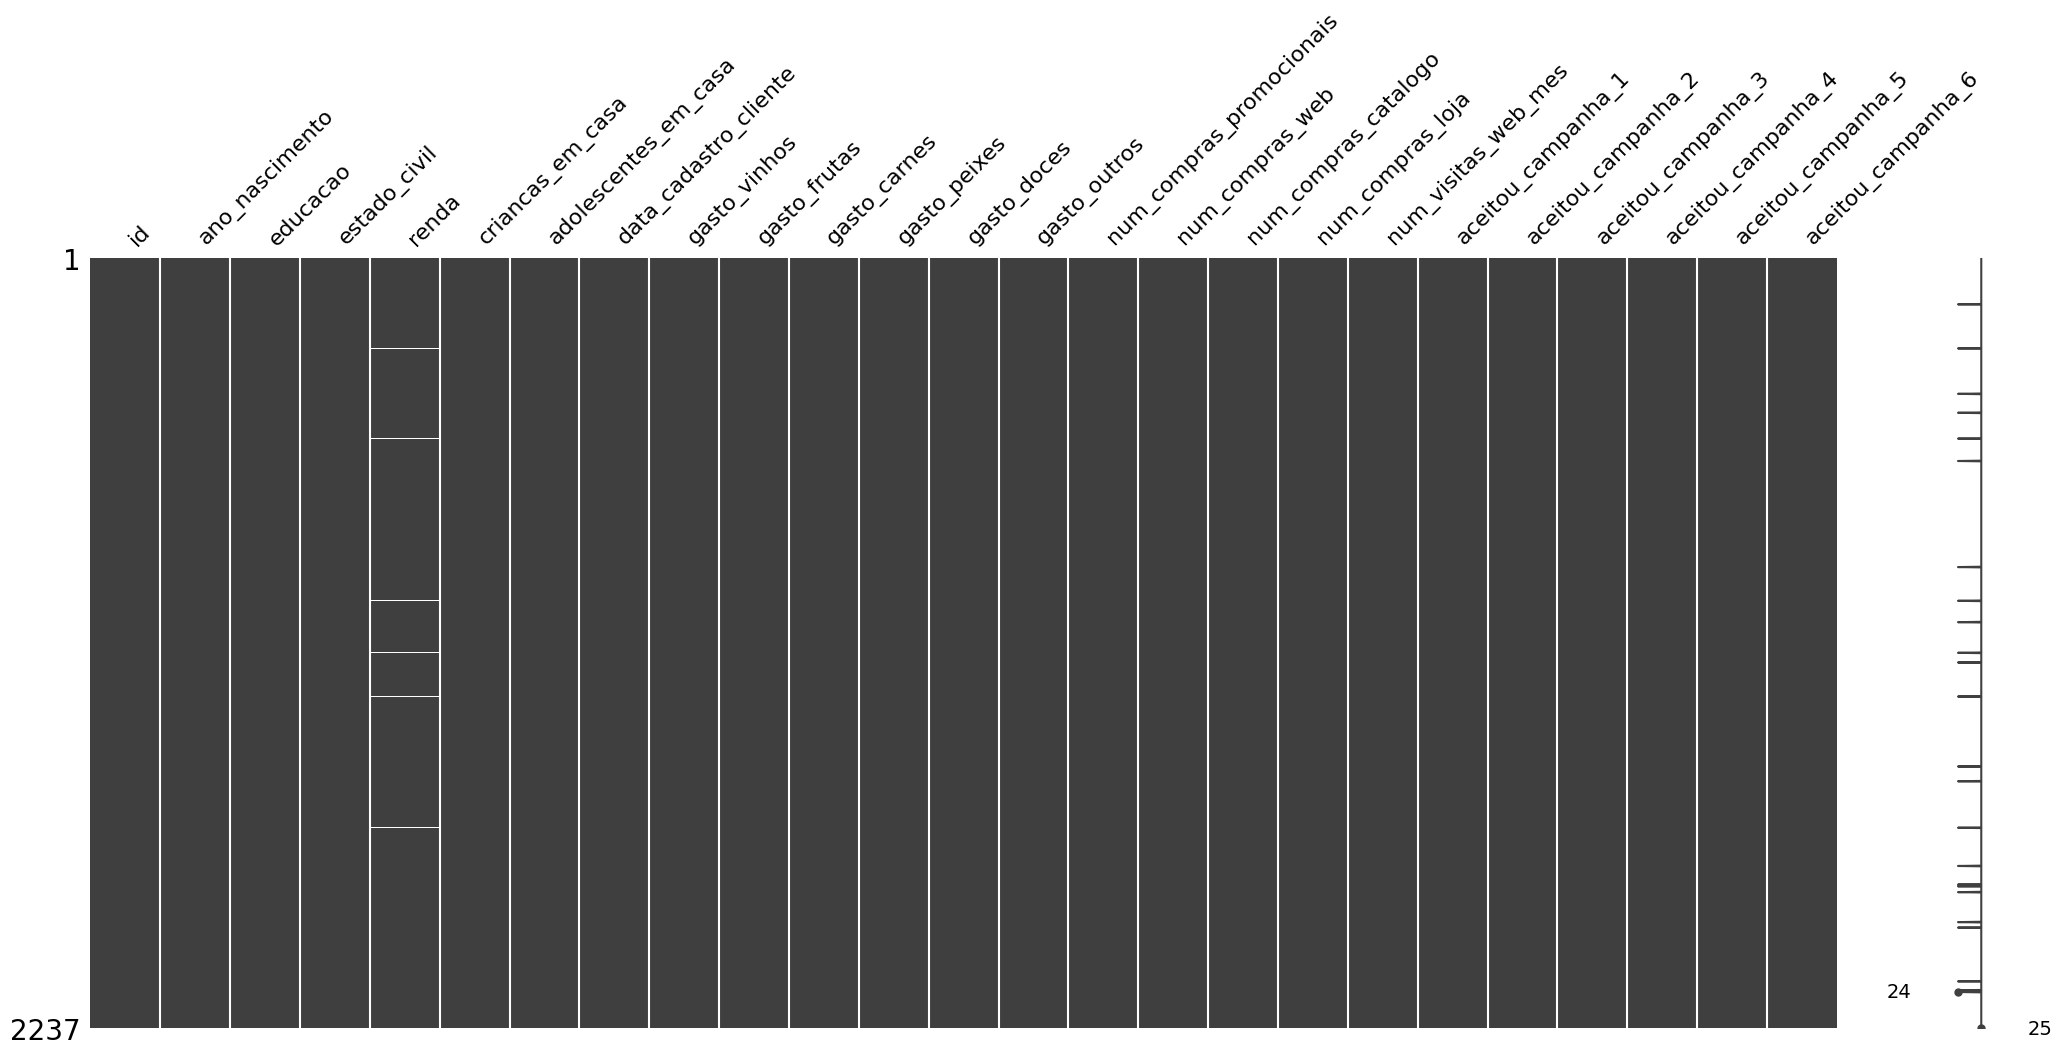

In [15]:
# Matriz de valores ausentes
msno.matrix(df_dsa)
plt.show()

In [16]:
# Soma de valores ausentes
valores_ausentes = df_dsa.isnull().sum().sort_values(ascending = False)

In [17]:
valores_ausentes

renda                       24
id                           0
gasto_outros                 0
aceitou_campanha_5           0
aceitou_campanha_4           0
aceitou_campanha_3           0
aceitou_campanha_2           0
aceitou_campanha_1           0
num_visitas_web_mes          0
num_compras_loja             0
num_compras_catalogo         0
num_compras_web              0
num_compras_promocionais     0
gasto_doces                  0
ano_nascimento               0
gasto_peixes                 0
gasto_carnes                 0
gasto_frutas                 0
gasto_vinhos                 0
data_cadastro_cliente        0
adolescentes_em_casa         0
criancas_em_casa             0
estado_civil                 0
educacao                     0
aceitou_campanha_6           0
dtype: int64

In [18]:
# Filtramos pelas que são diferentes de zero
print(valores_ausentes.loc[valores_ausentes != 0])

renda    24
dtype: int64


Para tratar os valores ausentes primeiro devemos checar se há outliers na variável, o que ajudará a tomar a decisão ideal de tratamento dos valores ausentes.

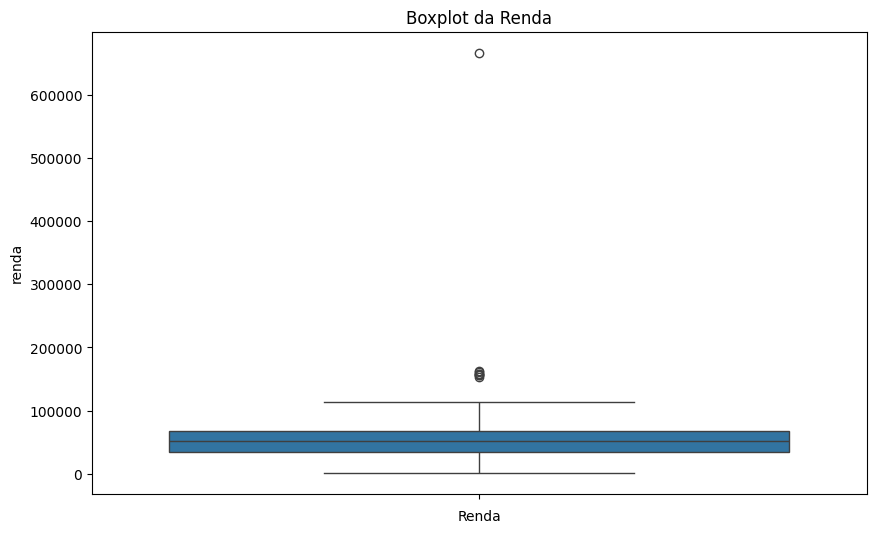

In [19]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df_dsa['renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

Sim, parece haver outliers. Vamos nos certificar usando a regra estatística.

In [20]:
# Calculando o IQR para a coluna 'Renda'
Q1 = df_dsa['renda'].quantile(0.25)
Q3 = df_dsa['renda'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
# Definindo os limites para considerar um ponto como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
# Identificando os outliers
outliers = df_dsa[(df_dsa['renda'] < lower_bound) | (df_dsa['renda'] > upper_bound)]
outliers

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_web,num_compras_catalogo,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6
325,4931,1977,Graduação,Casado,157146.0,0,0,2013-04-29,1,0,...,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Casado,160803.0,0,0,2008-04-12,55,16,...,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Graduação,Casado,666666.0,1,0,2006-02-13,9,14,...,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Casado,162397.0,1,1,2006-03-13,85,1,...,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Mestrado,Casado,157733.0,1,0,2006-04-13,39,1,...,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Graduação,Divorciado,153924.0,0,0,2002-07-14,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Casado,156924.0,0,0,2013-08-29,2,1,...,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Casado,157243.0,0,1,2003-01-14,20,2,...,0,22,0,0,0,0,0,0,0,0


Vamos checar a distribuição da variável.

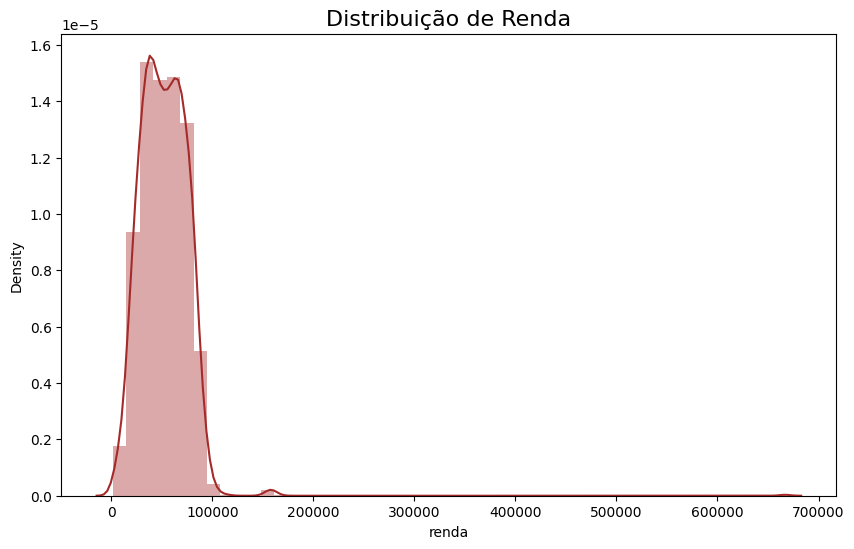

In [23]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df_dsa['renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Existem várias estratégias para tratar outliers em um conjunto de dados e a escolha da melhor abordagem depende do contexto específico e do objetivo da análise. Aqui estão algumas opções comuns:

**Remoção**: Simplesmente remover os outliers do conjunto de dados. Esta é uma abordagem direta, mas pode não ser ideal se o número de outliers for significativo ou se esses pontos contiverem informações importantes.

**Substituição**: Substituir os valores dos outliers por outros mais representativos, como a média ou mediana dos dados. Esta abordagem é útil se os outliers forem considerados erros de medição ou entrada de dados.

**Transformação**: Aplicar uma transformação aos dados pode reduzir o impacto dos outliers. Transformações comuns incluem logarítmica, raiz quadrada ou Box-Cox.

**Capping (Limitação)**: Definir um limite superior e/ou inferior para os valores dos dados. Valores além desses limites são trazidos para o limite mais próximo. Por exemplo, todos os valores acima do limite superior são definidos para esse limite.

**Análise Separada**: Às vezes, os outliers são mantidos no conjunto de dados e analisados separadamente para entender melhor suas características.

**Análise de Causa**: Investigar a causa dos outliers. Se eles são resultado de um fenômeno real, pode ser importante incluí-los na análise.

A escolha do método depende da natureza dos dados e do objetivo da análise. Em muitos casos, uma combinação dessas estratégias pode ser a mais eficaz. 

Vamos apenas remover os outliers pois são poucos registros.

In [24]:
# Filtrando o dataframe e removendo os outliers
df_dsa = df_dsa[(df_dsa['renda'] >= lower_bound) & (df_dsa['renda'] <= upper_bound)]

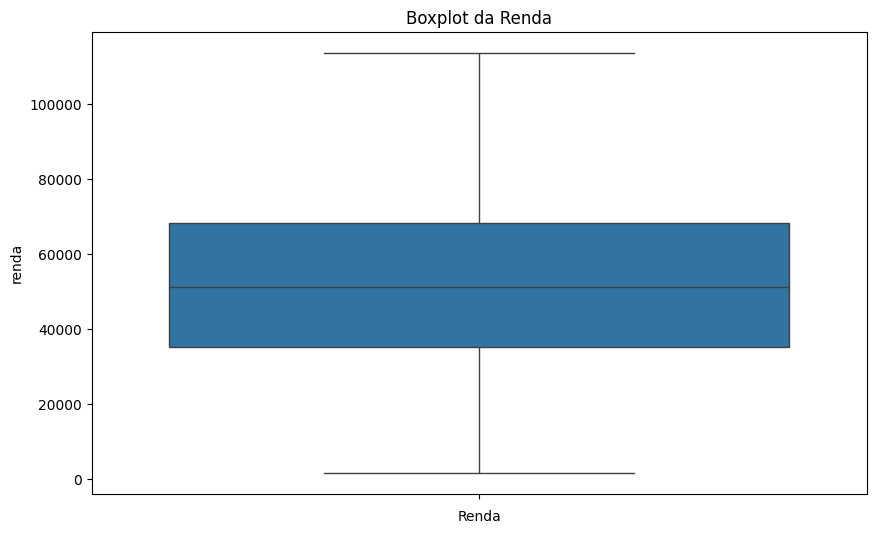

In [25]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df_dsa['renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

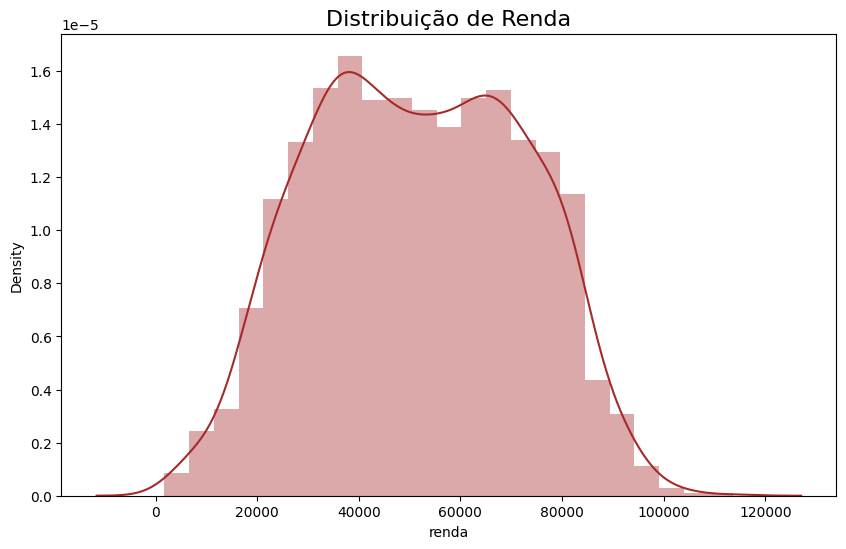

In [26]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df_dsa['renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Agora tratamos os valores ausentes.

In [27]:
media = df_dsa['renda'].mean()
media

np.float64(51622.0947845805)

In [28]:
mediana = df_dsa['renda'].median()
mediana

np.float64(51287.0)

In [29]:
moda = df_dsa['renda'].mode()
moda

0    7500.0
Name: renda, dtype: float64

In [30]:
# Normaliza os dados antes de aplicar o KNNImputer (opcional, mas recomendado)
# KNN espera que os dados estejam na mesma escala
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dsa[['renda']])

In [31]:
# Cria o KNNImputer
# Preenche o valor com dados dos vizinhos usando o algoritmo KNN
imputer = KNNImputer(n_neighbors=5)

In [32]:
# Imputa os valores ausentes com o imputer
data_imputed = imputer.fit_transform(data_scaled)

In [33]:
# Converter de volta para o formato original 
df_dsa['renda'] = scaler.inverse_transform(data_imputed)

In [34]:
print('Total de Valores Ausentes:', df_dsa.isnull().sum())

Total de Valores Ausentes: id                          0
ano_nascimento              0
educacao                    0
estado_civil                0
renda                       0
criancas_em_casa            0
adolescentes_em_casa        0
data_cadastro_cliente       0
gasto_vinhos                0
gasto_frutas                0
gasto_carnes                0
gasto_peixes                0
gasto_doces                 0
gasto_outros                0
num_compras_promocionais    0
num_compras_web             0
num_compras_catalogo        0
num_compras_loja            0
num_visitas_web_mes         0
aceitou_campanha_1          0
aceitou_campanha_2          0
aceitou_campanha_3          0
aceitou_campanha_4          0
aceitou_campanha_5          0
aceitou_campanha_6          0
dtype: int64


In [35]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_web,num_compras_catalogo,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


## Análise Exploratória e Engenharia de Atributos

In [36]:
# Colunas
df_dsa.columns

Index(['id', 'ano_nascimento', 'educacao', 'estado_civil', 'renda',
       'criancas_em_casa', 'adolescentes_em_casa', 'data_cadastro_cliente',
       'gasto_vinhos', 'gasto_frutas', 'gasto_carnes', 'gasto_peixes',
       'gasto_doces', 'gasto_outros', 'num_compras_promocionais',
       'num_compras_web', 'num_compras_catalogo', 'num_compras_loja',
       'num_visitas_web_mes', 'aceitou_campanha_1', 'aceitou_campanha_2',
       'aceitou_campanha_3', 'aceitou_campanha_4', 'aceitou_campanha_5',
       'aceitou_campanha_6'],
      dtype='object')

In [37]:
# Drop (em memória) das colunas categóricas para criar o box plot das colunas quantitativas
data_boxplot = df_dsa.drop(columns = ['id',
                                      'educacao',
                                      'estado_civil',
                                      'criancas_em_casa',
                                      'data_cadastro_cliente',
                                      'adolescentes_em_casa', 
                                      'aceitou_campanha_1', 
                                      'aceitou_campanha_2',
                                      'aceitou_campanha_3', 
                                      'aceitou_campanha_4', 
                                      'aceitou_campanha_5',
                                      'aceitou_campanha_6'])

In [38]:
data_boxplot.columns

Index(['ano_nascimento', 'renda', 'gasto_vinhos', 'gasto_frutas',
       'gasto_carnes', 'gasto_peixes', 'gasto_doces', 'gasto_outros',
       'num_compras_promocionais', 'num_compras_web', 'num_compras_catalogo',
       'num_compras_loja', 'num_visitas_web_mes'],
      dtype='object')

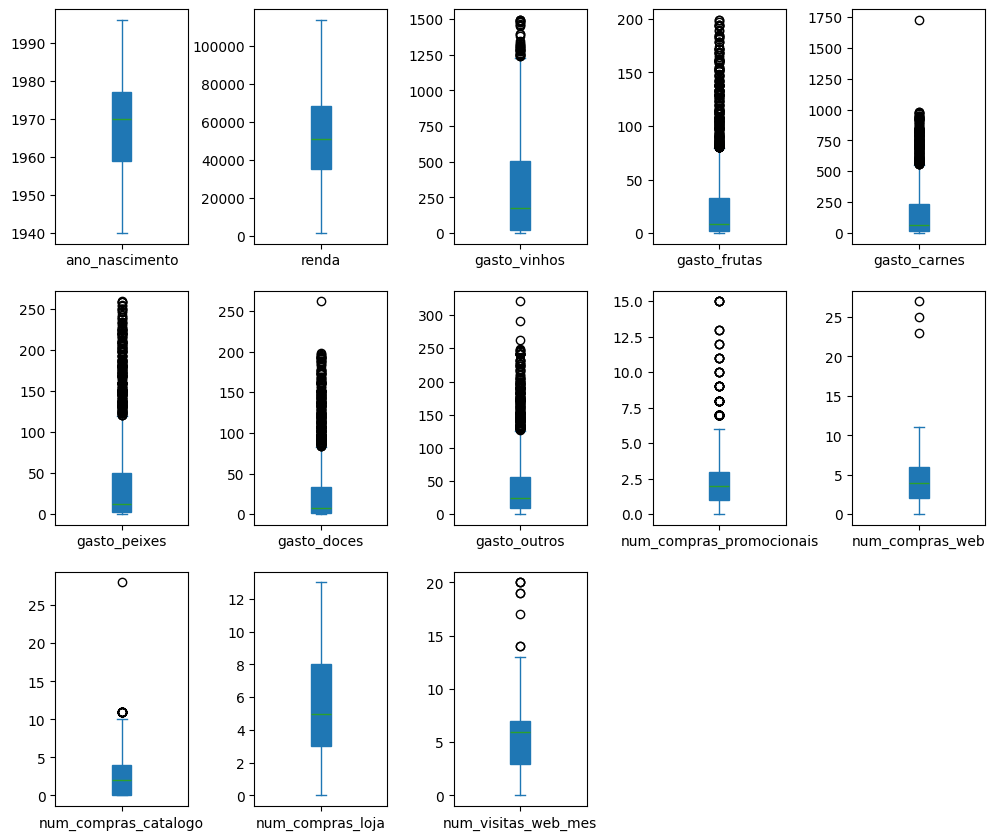

In [39]:
# Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

> Vamos transformar algumas variáveis, criar novas e combinar outras em um trabalho de engenharia de atributos que vai nos ajudar na exploração dos dados.

In [40]:
# Vamos criar uma nova coluna com a idade de cada cliente (ano atual - ano de nascimento)
ano_atual = datetime.now().year
df_dsa['idade'] = ano_atual - df_dsa['ano_nascimento']

In [41]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_catalogo,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,6,2,0,0,0,0,0,0,47
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,12,3,0,0,0,0,0,0,64
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,3,4,0,0,0,0,0,0,54
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,6,4,2,0,0,0,0,0,0,55
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,12,2,0,0,0,0,0,0,45


In [42]:
df_dsa['data_cadastro_cliente'].max()

Timestamp('2014-06-29 00:00:00')

In [43]:
# Criaremos uma coluna com o número de dias como cliente desde a data de cadastro
df_dsa['dias_como_cliente'] = df_dsa['data_cadastro_cliente'].max() - df_dsa['data_cadastro_cliente']

In [44]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,47,255 days
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,64,259 days
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,54,1294 days
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,55,272 days
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,45,2665 days


In [45]:
# Removeremos a palavra "days" ao final do valor de cada linha da coluna Dias_Como_Cliente
df_dsa['dias_como_cliente'] = df_dsa['dias_como_cliente'].astype(str).str.replace(' days', '')

In [46]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,47,255
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,64,259
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,54,1294
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,55,272
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,45,2665


In [47]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2205 non-null   int64         
 1   ano_nascimento            2205 non-null   int64         
 2   educacao                  2205 non-null   object        
 3   estado_civil              2205 non-null   object        
 4   renda                     2205 non-null   float64       
 5   criancas_em_casa          2205 non-null   int64         
 6   adolescentes_em_casa      2205 non-null   int64         
 7   data_cadastro_cliente     2205 non-null   datetime64[ns]
 8   gasto_vinhos              2205 non-null   int64         
 9   gasto_frutas              2205 non-null   int64         
 10  gasto_carnes              2205 non-null   int64         
 11  gasto_peixes              2205 non-null   int64         
 12  gasto_doces              

In [48]:
# Ajusta o tipo de dado da variável Dias_Como_Cliente
df_dsa['dias_como_cliente'] = pd.to_numeric(df_dsa['dias_como_cliente'], downcast = 'integer')

In [49]:
df_dsa.columns

Index(['id', 'ano_nascimento', 'educacao', 'estado_civil', 'renda',
       'criancas_em_casa', 'adolescentes_em_casa', 'data_cadastro_cliente',
       'gasto_vinhos', 'gasto_frutas', 'gasto_carnes', 'gasto_peixes',
       'gasto_doces', 'gasto_outros', 'num_compras_promocionais',
       'num_compras_web', 'num_compras_catalogo', 'num_compras_loja',
       'num_visitas_web_mes', 'aceitou_campanha_1', 'aceitou_campanha_2',
       'aceitou_campanha_3', 'aceitou_campanha_4', 'aceitou_campanha_5',
       'aceitou_campanha_6', 'idade', 'dias_como_cliente'],
      dtype='object')

In [50]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2205 non-null   int64         
 1   ano_nascimento            2205 non-null   int64         
 2   educacao                  2205 non-null   object        
 3   estado_civil              2205 non-null   object        
 4   renda                     2205 non-null   float64       
 5   criancas_em_casa          2205 non-null   int64         
 6   adolescentes_em_casa      2205 non-null   int64         
 7   data_cadastro_cliente     2205 non-null   datetime64[ns]
 8   gasto_vinhos              2205 non-null   int64         
 9   gasto_frutas              2205 non-null   int64         
 10  gasto_carnes              2205 non-null   int64         
 11  gasto_peixes              2205 non-null   int64         
 12  gasto_doces              

In [51]:
# Cria uma variável com o Total de Compras realizadas nos 3 diferentes canais
df_dsa['total_compras'] = df_dsa['num_compras_web'] + df_dsa['num_compras_catalogo'] + df_dsa['num_compras_loja']

In [52]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,2,0,0,0,0,0,0,47,255,8
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,3,0,0,0,0,0,0,64,259,26
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,4,0,0,0,0,0,0,54,1294,4
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,2,0,0,0,0,0,0,55,272,14
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,0,0,0,0,0,0,45,2665,19


In [53]:
df_dsa.columns

Index(['id', 'ano_nascimento', 'educacao', 'estado_civil', 'renda',
       'criancas_em_casa', 'adolescentes_em_casa', 'data_cadastro_cliente',
       'gasto_vinhos', 'gasto_frutas', 'gasto_carnes', 'gasto_peixes',
       'gasto_doces', 'gasto_outros', 'num_compras_promocionais',
       'num_compras_web', 'num_compras_catalogo', 'num_compras_loja',
       'num_visitas_web_mes', 'aceitou_campanha_1', 'aceitou_campanha_2',
       'aceitou_campanha_3', 'aceitou_campanha_4', 'aceitou_campanha_5',
       'aceitou_campanha_6', 'idade', 'dias_como_cliente', 'total_compras'],
      dtype='object')

In [54]:
# Cria a variável Gasto_Total com o somatório de todas as colunas que começam com o nome Gasto
df_dsa['gasto_total'] = df_dsa.filter(like = 'gasto').sum(axis=1)

In [55]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,0,47,255,8,162
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,0,64,259,26,1123
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,0,54,1294,4,17
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,0,55,272,14,1044
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,0,45,2665,19,758


In [56]:
df_dsa.columns

Index(['id', 'ano_nascimento', 'educacao', 'estado_civil', 'renda',
       'criancas_em_casa', 'adolescentes_em_casa', 'data_cadastro_cliente',
       'gasto_vinhos', 'gasto_frutas', 'gasto_carnes', 'gasto_peixes',
       'gasto_doces', 'gasto_outros', 'num_compras_promocionais',
       'num_compras_web', 'num_compras_catalogo', 'num_compras_loja',
       'num_visitas_web_mes', 'aceitou_campanha_1', 'aceitou_campanha_2',
       'aceitou_campanha_3', 'aceitou_campanha_4', 'aceitou_campanha_5',
       'aceitou_campanha_6', 'idade', 'dias_como_cliente', 'total_compras',
       'gasto_total'],
      dtype='object')

In [57]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2205 non-null   int64         
 1   ano_nascimento            2205 non-null   int64         
 2   educacao                  2205 non-null   object        
 3   estado_civil              2205 non-null   object        
 4   renda                     2205 non-null   float64       
 5   criancas_em_casa          2205 non-null   int64         
 6   adolescentes_em_casa      2205 non-null   int64         
 7   data_cadastro_cliente     2205 non-null   datetime64[ns]
 8   gasto_vinhos              2205 non-null   int64         
 9   gasto_frutas              2205 non-null   int64         
 10  gasto_carnes              2205 non-null   int64         
 11  gasto_peixes              2205 non-null   int64         
 12  gasto_doces              

In [58]:
df_dsa['aceitou_campanha_1'].value_counts()

aceitou_campanha_1
0    2042
1     163
Name: count, dtype: int64

In [59]:
df_dsa['aceitou_campanha_2'].value_counts()

aceitou_campanha_2
0    2041
1     164
Name: count, dtype: int64

In [141]:
# Criaremos a variável para indicar se o cliente aceitou qualquer campanha (e comprou o produto ofertado)
df_dsa['aceite_campanha'] = df_dsa.filter(like = 'aceitou').sum(axis = 1)

In [142]:
df_dsa.sample(10)

,id,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,...,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total,resposta_campanha,aceite_campanha
1192,839,PhD,Casado,45503.0,1,0,97,4,44,6,...,0,0,0,0,49,277,8,170,0,0
346,10507,Ensino Médio,Divorciado,59601.0,0,1,691,7,69,0,...,0,0,0,0,47,339,11,797,1,1
1913,2961,Graduação,Casado,42081.0,1,0,175,10,110,54,...,0,0,0,0,42,488,13,382,1,1
786,9097,Graduação,Divorciado,46086.0,0,1,244,8,32,7,...,0,0,0,0,68,1204,12,343,0,0
1899,4676,Mestrado,Viúvo,73705.0,0,2,612,91,520,258,...,0,0,0,0,73,4064,23,1695,0,0
1888,5253,Mestrado,Casado,54603.0,1,1,145,13,46,17,...,0,0,0,0,68,2481,10,227,0,0
1189,2345,PhD,Casado,70038.0,0,0,587,54,348,71,...,0,0,0,0,42,247,16,1244,0,0
288,11176,PhD,Casado,65968.0,0,1,376,9,83,19,...,0,0,0,0,54,3119,16,495,0,0
570,9291,Mestrado,Casado,34242.0,0,1,8,2,4,0,...,0,0,0,0,65,98,3,15,0,0
1193,3706,Graduação,Solteiro,28647.0,1,0,19,8,29,0,...,0,0,0,1,46,312,6,94,1,2


In [62]:
df_dsa.sample(10)

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total,aceite_campanha
2209,843,1971,Graduação,Casado,64722.0,1,0,2014-05-26,303,0,...,0,0,0,0,0,53,34,21,805,0
1778,7441,1973,Graduação,Divorciado,71128.0,1,0,2010-06-12,958,159,...,0,0,0,0,0,51,1478,24,1615,0
1396,2928,1975,PhD,Solteiro,52614.0,0,1,2012-01-12,789,0,...,0,0,0,0,0,49,899,14,990,0
2197,22,1976,Graduação,Divorciado,46310.0,1,0,2012-03-12,185,2,...,0,0,0,0,0,48,839,12,309,0
1168,6230,1971,Graduação,Divorciado,44421.0,1,1,2013-02-15,110,5,...,0,0,0,0,0,53,499,9,189,0
2019,6619,1978,Graduação,Casado,38415.0,1,1,2001-02-13,22,1,...,0,0,0,0,0,46,4884,4,44,0
186,9986,1982,Graduação,Casado,19444.0,1,0,2014-02-22,16,0,...,0,0,0,0,1,42,127,7,54,1
1884,6049,1982,Mestrado,Casado,73450.0,0,0,2012-05-13,1142,51,...,0,0,1,0,0,42,777,26,1804,2
1678,3483,1958,Graduação,Casado,48192.0,0,0,2004-06-13,1039,43,...,1,0,1,1,1,66,3668,22,1526,4
474,4939,1946,Graduação,Casado,37760.0,0,0,2012-08-31,84,5,...,0,0,0,0,0,78,667,11,317,0


In [63]:
# Vamos ajustar o tipo de dado e colocar em uma nova coluna
df_dsa['resposta_campanha'] = df_dsa['aceite_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')

In [64]:
df_dsa.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total,aceite_campanha,resposta_campanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,47,255,8,162,0,Não Aceitou
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,64,259,26,1123,0,Não Aceitou
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,54,1294,4,17,0,Não Aceitou
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,55,272,14,1044,0,Não Aceitou
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,45,2665,19,758,0,Não Aceitou


In [65]:
df_dsa.sample(10)

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total,aceite_campanha,resposta_campanha
58,5371,1989,Graduação,Solteiro,21474.0,1,0,2004-08-14,6,16,...,0,0,0,1,35,3606,6,91,2,Aceitou
650,10928,1958,Graduação,Casado,66886.0,0,1,2013-09-16,315,4,...,0,0,0,0,66,286,15,599,0,Não Aceitou
2181,5871,1979,Mestrado,Casado,24401.0,0,0,2012-08-31,73,28,...,0,0,0,0,45,667,13,467,0,Não Aceitou
801,2072,1969,PhD,Casado,53374.0,0,1,2012-08-16,896,10,...,0,0,0,1,55,682,15,1064,2,Aceitou
1281,5123,1951,Mestrado,Casado,27450.0,0,0,2013-04-15,37,12,...,0,0,0,0,73,440,6,143,0,Não Aceitou
1555,7327,1959,PhD,Casado,36732.0,1,1,2013-12-29,21,5,...,0,0,0,0,65,182,6,47,0,Não Aceitou
1707,4086,1959,Graduação,Casado,18690.0,0,0,2012-12-28,6,1,...,0,0,0,0,65,548,4,60,0,Não Aceitou
2077,6534,1974,Graduação,Casado,47889.0,1,0,2001-04-14,29,0,...,0,0,0,0,50,4824,5,67,0,Não Aceitou
295,7849,1970,PhD,Casado,80336.0,0,0,2009-09-13,209,19,...,0,0,0,0,54,1750,24,1052,0,Não Aceitou
1206,7108,1965,Mestrado,Viúvo,51390.0,1,1,2009-08-12,205,20,...,0,0,0,0,59,1782,12,353,0,Não Aceitou


In [66]:
# Vamos observar uma amostra aleatória das variáveis que criamos
df_dsa[['idade', 'dias_como_cliente', 'total_compras', 'gasto_total', 'resposta_campanha']].sample(10)

,idade,dias_como_cliente,total_compras,gasto_total,resposta_campanha
1643,61,437,7,162,Não Aceitou
628,43,3454,24,1298,Aceitou
1045,54,489,11,310,Não Aceitou
597,59,312,20,776,Não Aceitou
909,71,228,22,1507,Aceitou
1674,48,1962,6,81,Não Aceitou
816,37,1782,7,210,Aceitou
944,47,37,25,1092,Não Aceitou
1264,76,47,20,1348,Não Aceitou
10,76,4884,19,685,Não Aceitou


In [67]:
# Não precisamos mais destas variáveis
df_dsa.drop(['ano_nascimento', 'data_cadastro_cliente', 'aceite_campanha'], axis = 1, inplace = True)

In [68]:
df_dsa.head()

,id,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,...,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total,resposta_campanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,47,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,64,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,54,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,55,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,45,2665,19,758,Não Aceitou


# Continuaremos no Próximo Capítulo.

In [69]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [70]:
#%watermark -v -m

In [71]:
#%watermark --iversions

# Fim

In [72]:
df_dsa.describe()

,id,renda,criancas_em_casa,adolescentes_em_casa,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,gasto_doces,gasto_outros,...,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.073923,0.074376,0.073016,0.064399,0.013605,0.15102,55.095692,1307.092971,12.569615,606.821769
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.261705,0.262442,0.260222,0.245518,0.115872,0.35815,11.705801,1429.824606,7.180350,601.675284
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.000000,0.000000,0.000000,5.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,47.000000,286.000000,6.000000,69.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,54.000000,583.000000,12.000000,397.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,65.000000,2116.000000,18.000000,1047.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,84.000000,4915.000000,32.000000,2525.000000


## Extraindo Insights com Análise Multivariada

Vamos analisar os dados e extrair insights respondendo diversas perguntas de negócio.

***** Segunda Etapa do Projeto ***** 

### Qual o Comportamento (Distribuição) das Variáveis?

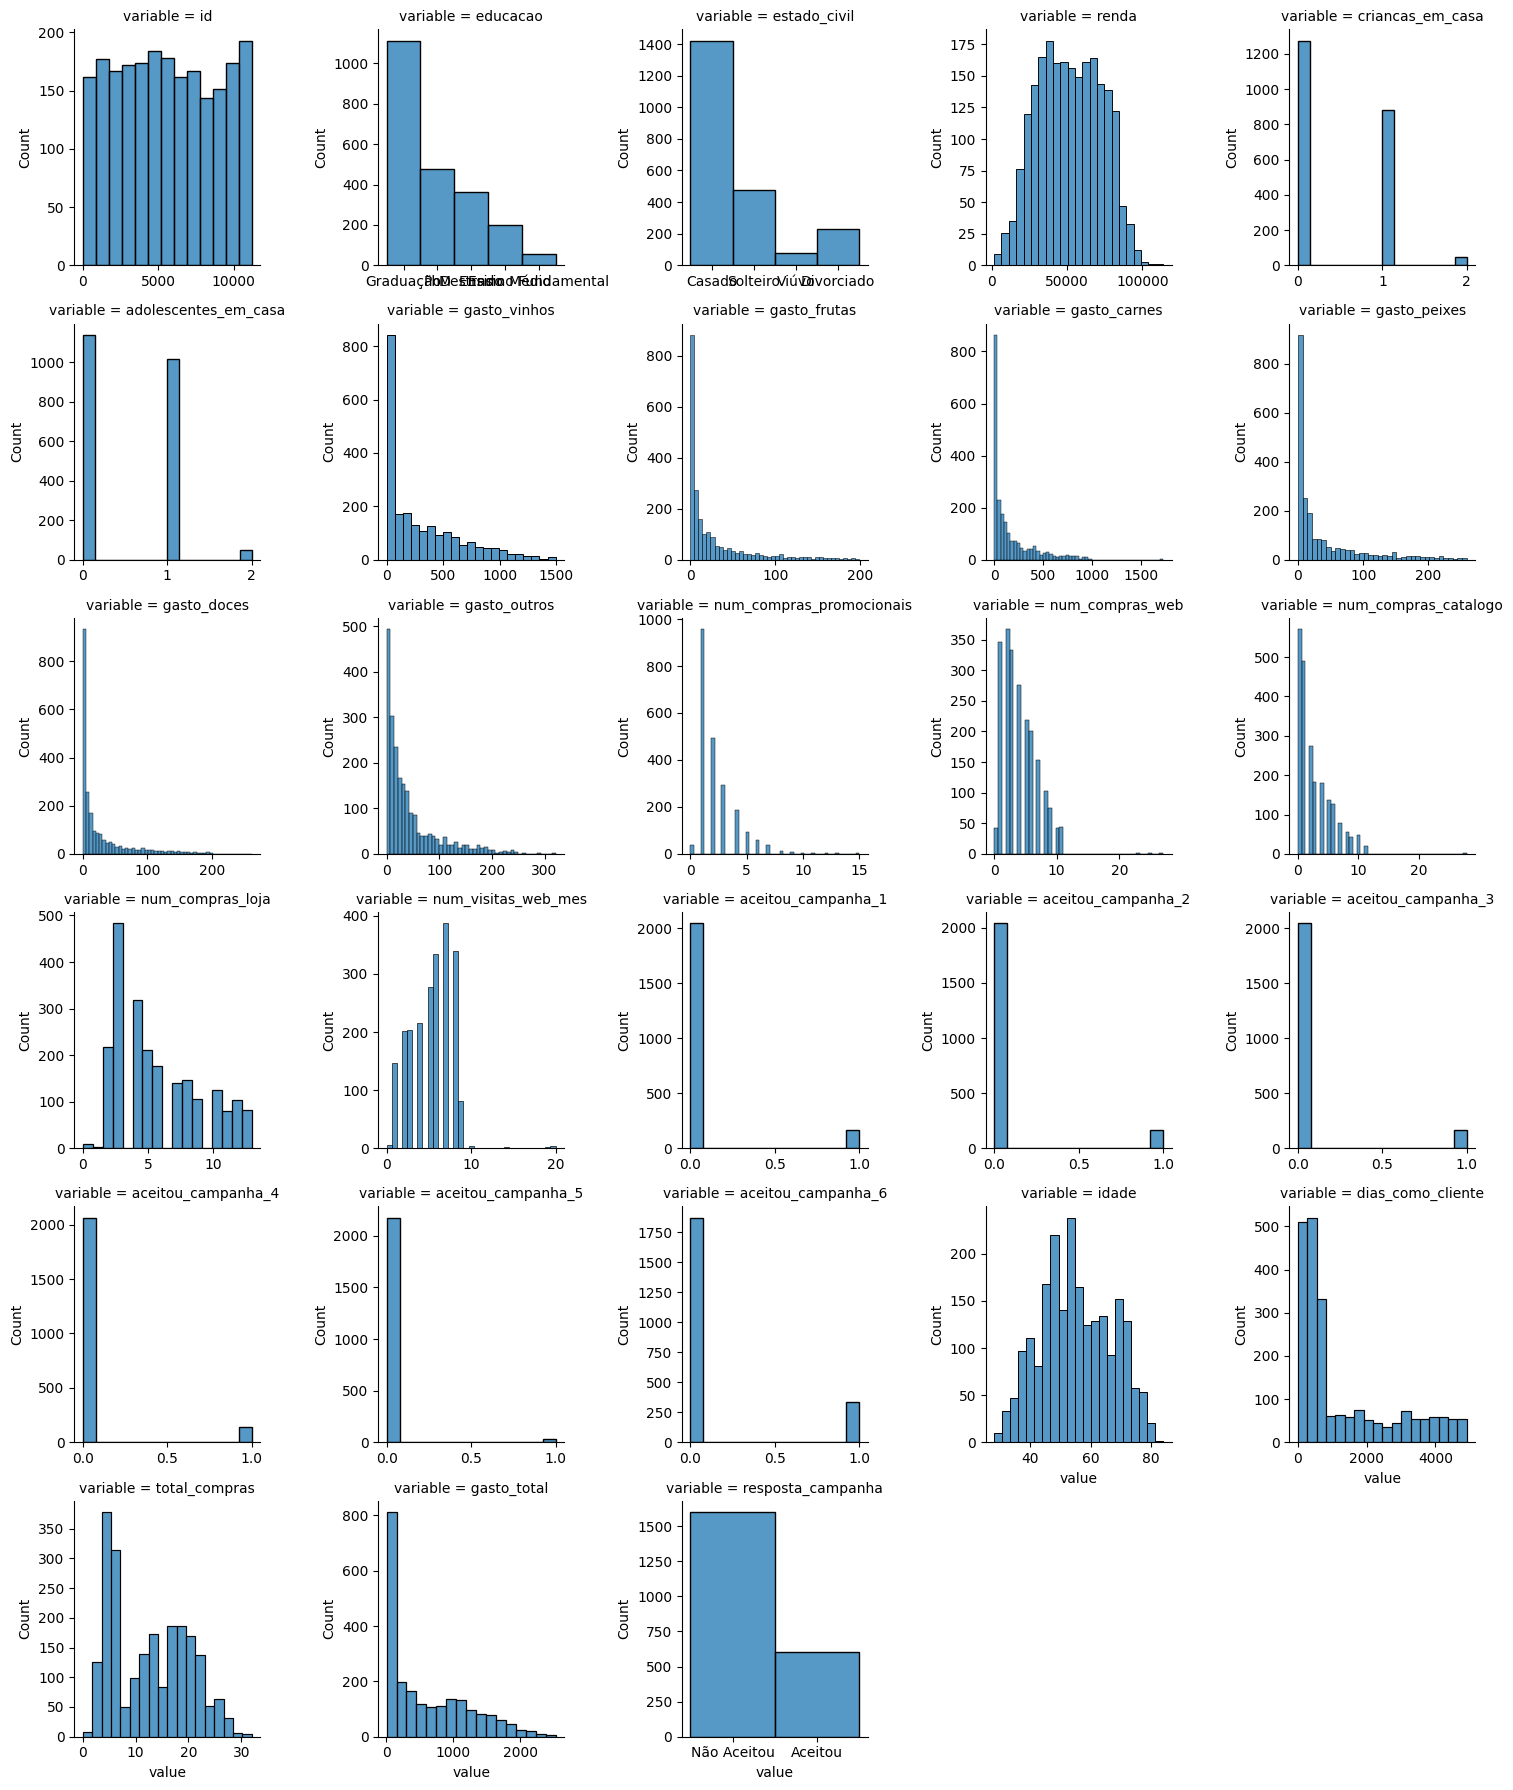

In [73]:
# Distribuição das Variáveis
hist = pd.melt(df_dsa, value_vars = df_dsa )
hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
hist.map(sns.histplot, 'value') 

### Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?

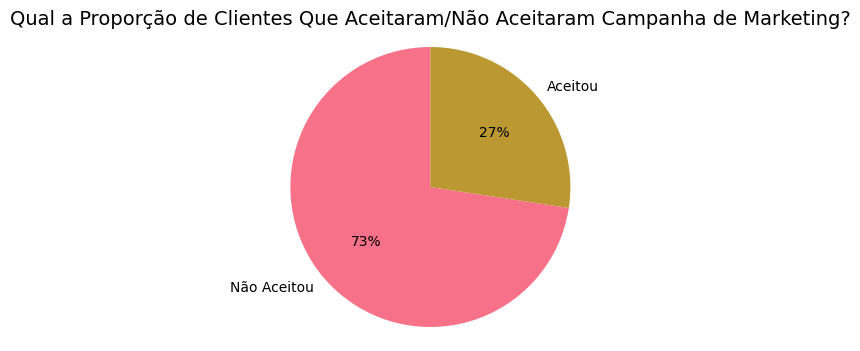

In [74]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (6, 4))

# Conta as ocorrências de cada resposta
counts = df_dsa['resposta_campanha'].value_counts()
labels = counts.index.tolist()

# Paleta de cores
colors = sns.color_palette('husl')

# Pie chart
ax.pie(counts, labels = labels, colors = colors, autopct = '%.0f%%', startangle = 90)

# Título
ax.set_title('Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?', fontsize = 14)

# Mantém os eixos iguais
ax.axis('equal')

# Display 
plt.show()

### Qual a Taxa de Sucesso de Cada Uma das 6 Campanhas?

In [75]:
percent = round(len(df_dsa[df_dsa['aceitou_campanha_1'] == 1]) / len(df_dsa['aceitou_campanha_1']) * 100, 2)
print(f"Percentual que aceitou a campanha 1: {percent}%")
percent = round(len(df_dsa[df_dsa['aceitou_campanha_2'] == 1]) / len(df_dsa['aceitou_campanha_2']) * 100, 2)
print(f"Percentual que aceitou a campanha 2: {percent}%")
percent = round(len(df_dsa[df_dsa['aceitou_campanha_3'] == 1]) / len(df_dsa['aceitou_campanha_3']) * 100, 2)
print(f"Percentual que aceitou a campanha 3: {percent}%")
percent = round(len(df_dsa[df_dsa['aceitou_campanha_4'] == 1]) / len(df_dsa['aceitou_campanha_4']) * 100, 2)
print(f"Percentual que aceitou a campanha 4: {percent}%")
percent = round(len(df_dsa[df_dsa['aceitou_campanha_5'] == 1]) / len(df_dsa['aceitou_campanha_5']) * 100, 2)
print(f"Percentual que aceitou a campanha 5: {percent}%")
percent = round(len(df_dsa[df_dsa['aceitou_campanha_6'] == 1]) / len(df_dsa['aceitou_campanha_6']) * 100, 2)
print(f"Percentual que aceitou a campanha 6: {percent}%")

Percentual que aceitou a campanha 1: 7.39%
Percentual que aceitou a campanha 2: 7.44%
Percentual que aceitou a campanha 3: 7.3%
Percentual que aceitou a campanha 4: 6.44%
Percentual que aceitou a campanha 5: 1.36%
Percentual que aceitou a campanha 6: 15.1%


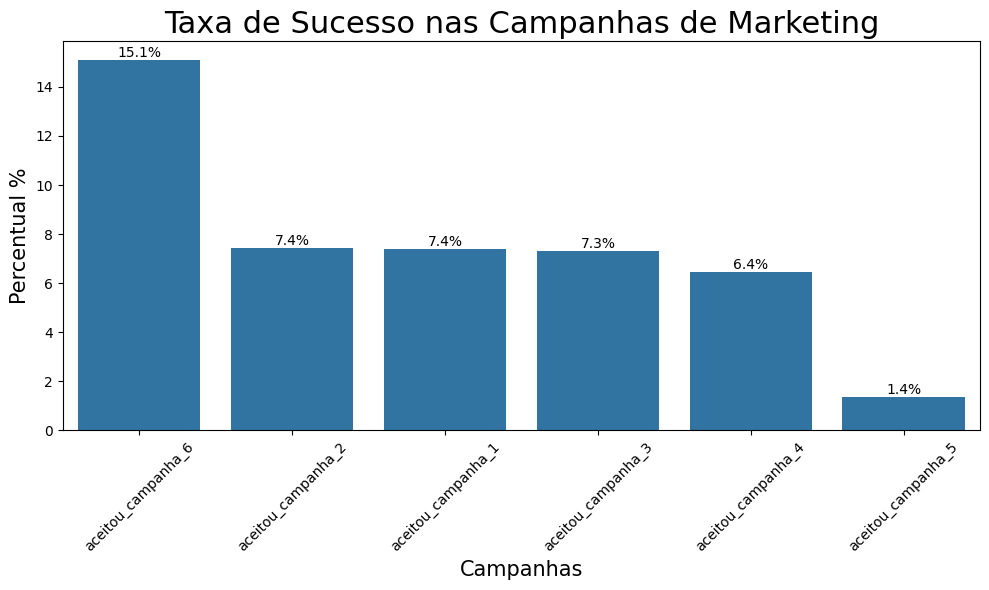

In [76]:
# Lista de campanhas
Campanhas = ['aceitou_campanha_1', 
             'aceitou_campanha_2', 
             'aceitou_campanha_3', 
             'aceitou_campanha_4', 
             'aceitou_campanha_5', 
             'aceitou_campanha_6']

# Calcula o percentual
campaigns = pd.DataFrame(df_dsa[Campanhas].mean() * 100, columns = ['Percent']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', y = 'Percent', data = campaigns.sort_values('Percent', ascending = False))

# Labels
plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de Sucesso nas Campanhas de Marketing', size = 22)

# Inclui o percentual no gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, 
                 p.get_height()), 
                ha = 'center', 
                va = 'bottom')

# Inclina os rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Display 
plt.tight_layout()
plt.show()

### A Idade Tem Influência nas Decisões de Gastos dos Clientes?

In [77]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2205 non-null   int64  
 1   educacao                  2205 non-null   object 
 2   estado_civil              2205 non-null   object 
 3   renda                     2205 non-null   float64
 4   criancas_em_casa          2205 non-null   int64  
 5   adolescentes_em_casa      2205 non-null   int64  
 6   gasto_vinhos              2205 non-null   int64  
 7   gasto_frutas              2205 non-null   int64  
 8   gasto_carnes              2205 non-null   int64  
 9   gasto_peixes              2205 non-null   int64  
 10  gasto_doces               2205 non-null   int64  
 11  gasto_outros              2205 non-null   int64  
 12  num_compras_promocionais  2205 non-null   int64  
 13  num_compras_web           2205 non-null   int64  
 14  num_compras_c

In [78]:
# Filtra as colunas categóricas e calcula a correlação das colunas quantitativas
df_dsa_corr = df_dsa.drop(['id',
                           'educacao',
                           'estado_civil',
                           'criancas_em_casa',
                           'adolescentes_em_casa', 
                           'aceitou_campanha_1', 
                           'aceitou_campanha_2',
                           'aceitou_campanha_3', 
                           'aceitou_campanha_4', 
                           'aceitou_campanha_5',
                           'aceitou_campanha_6',
                           'resposta_campanha'
                           ], axis=1).corr()

In [79]:
column_corr = df_dsa_corr.loc['idade']

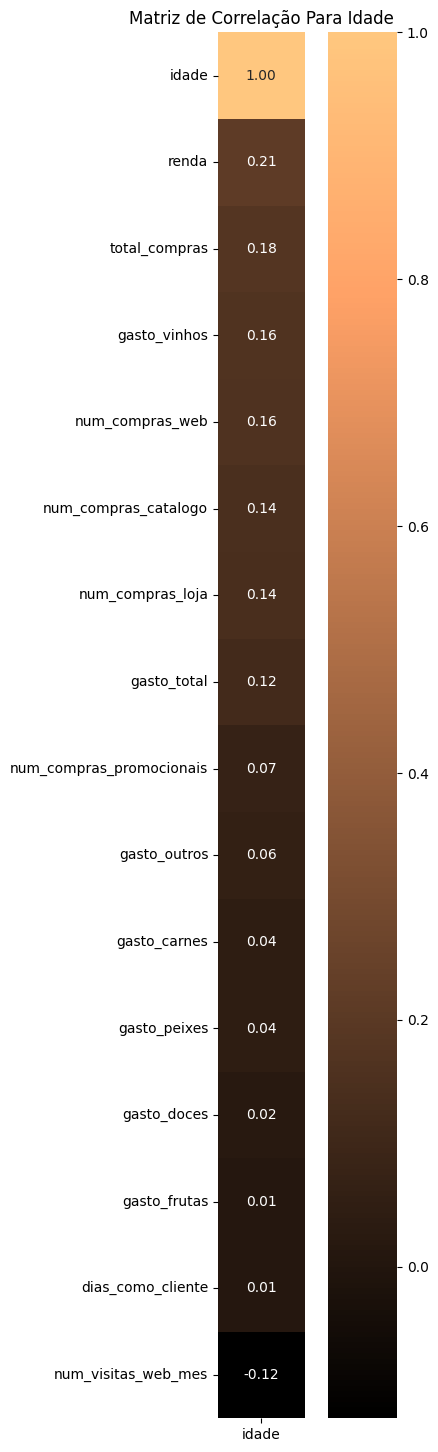

In [80]:
# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

In [81]:
df_dsa['resposta_campanha'] = df_dsa['resposta_campanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

In [82]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2205 non-null   int64  
 1   educacao                  2205 non-null   object 
 2   estado_civil              2205 non-null   object 
 3   renda                     2205 non-null   float64
 4   criancas_em_casa          2205 non-null   int64  
 5   adolescentes_em_casa      2205 non-null   int64  
 6   gasto_vinhos              2205 non-null   int64  
 7   gasto_frutas              2205 non-null   int64  
 8   gasto_carnes              2205 non-null   int64  
 9   gasto_peixes              2205 non-null   int64  
 10  gasto_doces               2205 non-null   int64  
 11  gasto_outros              2205 non-null   int64  
 12  num_compras_promocionais  2205 non-null   int64  
 13  num_compras_web           2205 non-null   int64  
 14  num_compras_c

In [83]:
df_dsa_corr = df_dsa.drop(['id',
                           'educacao',
                           'estado_civil',
                           'criancas_em_casa',
                           'adolescentes_em_casa', 
                           'aceitou_campanha_1', 
                           'aceitou_campanha_2',
                           'aceitou_campanha_3', 
                           'aceitou_campanha_4', 
                           'aceitou_campanha_5',
                           'aceitou_campanha_6'
                           ], axis=1).corr()

In [84]:
column_corr = df_dsa_corr.loc['resposta_campanha']

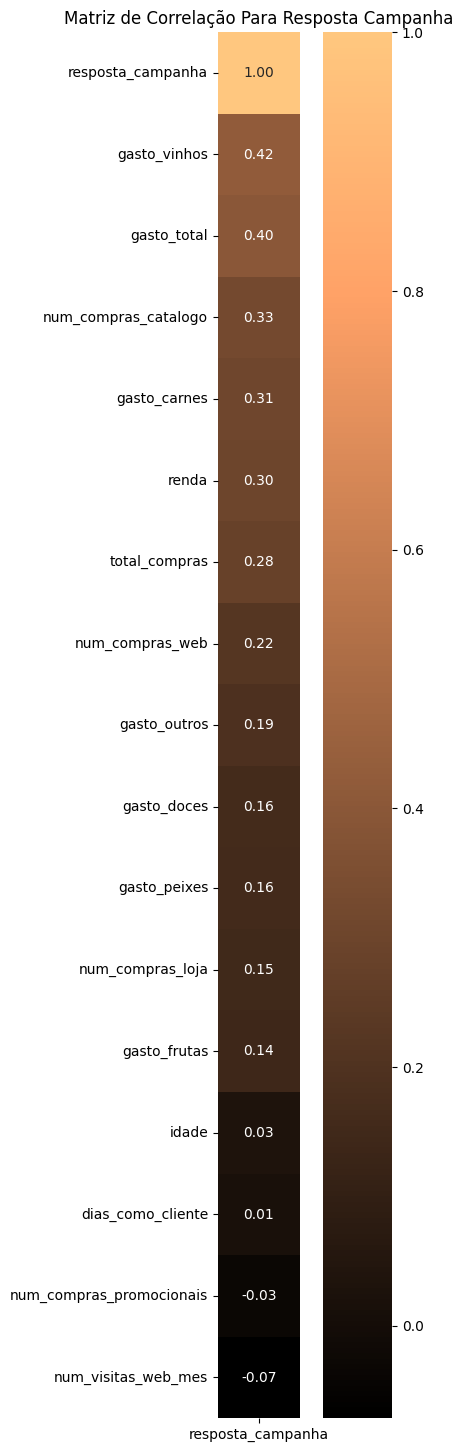

In [85]:
# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Resposta Campanha')
plt.show()

### Qual a Relação Entre Gasto Total e Resposta às Campanhas de Marketing?

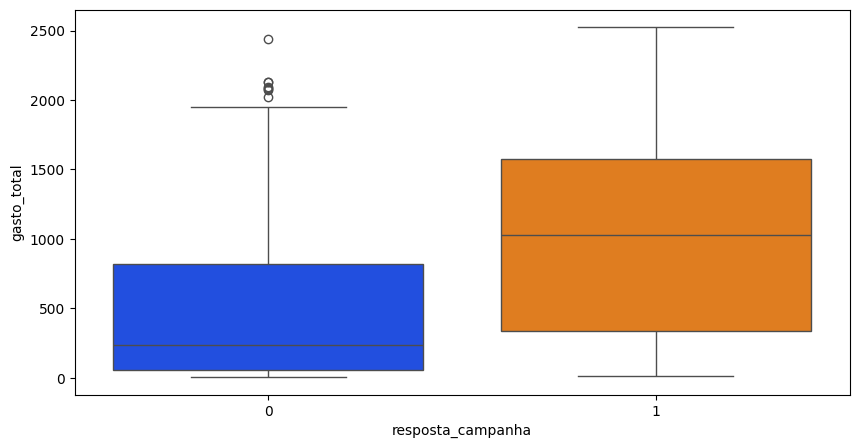

In [86]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'resposta_campanha', y = 'gasto_total', data = df_dsa, palette = 'bright');

### Em Qual Categoria de Produto os Clientes Têm Maior Gasto?

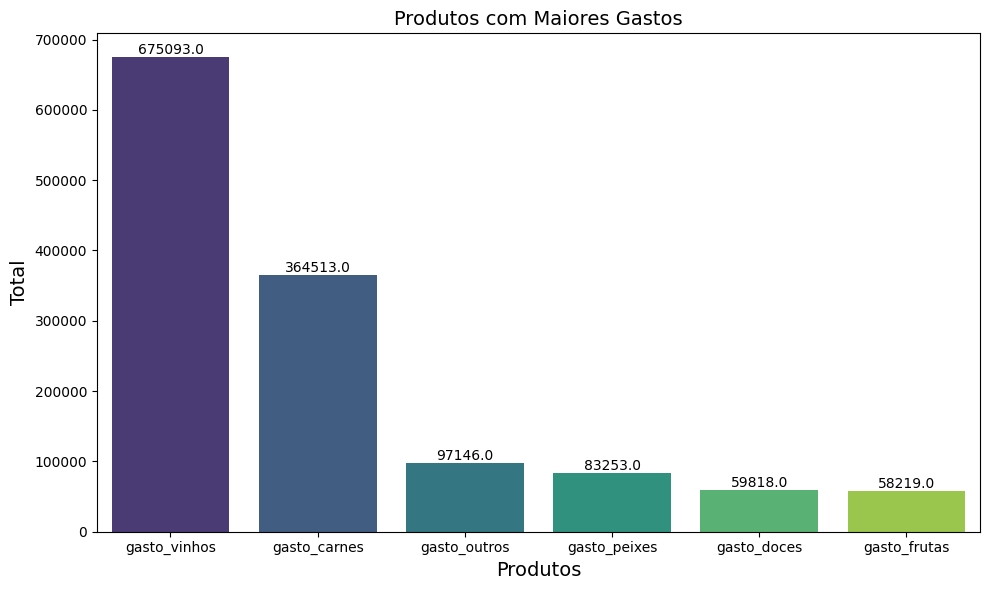

In [87]:
# Categorias de produtos
produtos = ['gasto_vinhos', 
            'gasto_frutas',
            'gasto_carnes', 
            'gasto_peixes',
            'gasto_doces',
            'gasto_outros']

# Cria o dataframe com os totais
df_produtos = pd.DataFrame(df_dsa[produtos].sum(), columns = ['Sum']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', 
                 y = 'Sum', 
                 data = df_produtos.sort_values('Sum', ascending = False), 
                 palette = 'viridis')

# Labels
plt.xlabel('Produtos', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Produtos com Maiores Gastos', size = 14)

# Inclui os valores no gráfico
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

# Display 
plt.tight_layout()
plt.show()

### Qual a Relação Entre Gasto com Vinho e Resposta às Campanhas de Marketing?

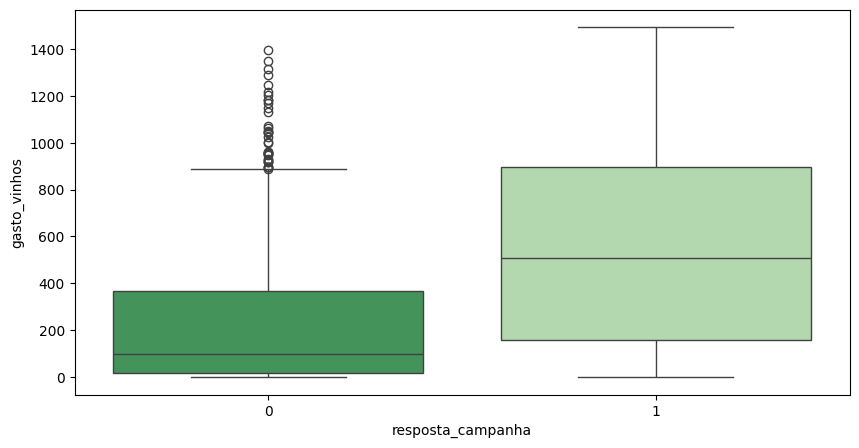

In [88]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'resposta_campanha', y = 'gasto_vinhos', data = df_dsa, palette = 'Greens_r');

### Qual a Relação Entre Renda e Resposta às Campanhas de Marketing?

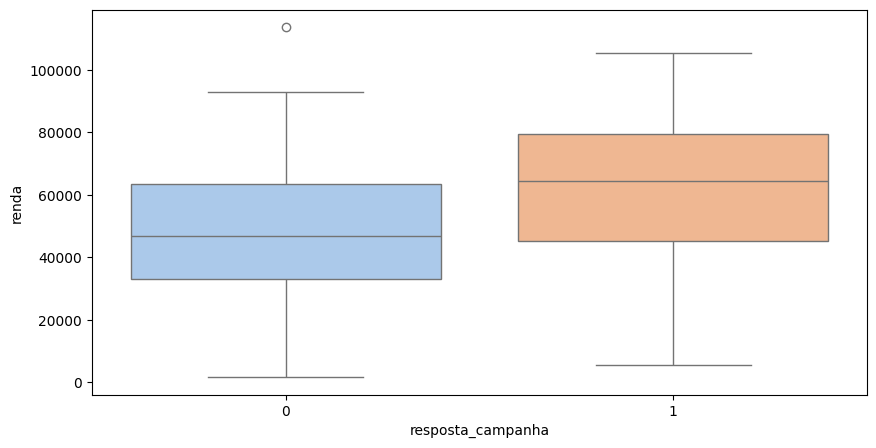

In [117]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'resposta_campanha', y = 'renda', data = df_dsa, palette = 'pastel');

### Qual a Relação Entre Renda e Gasto Total?

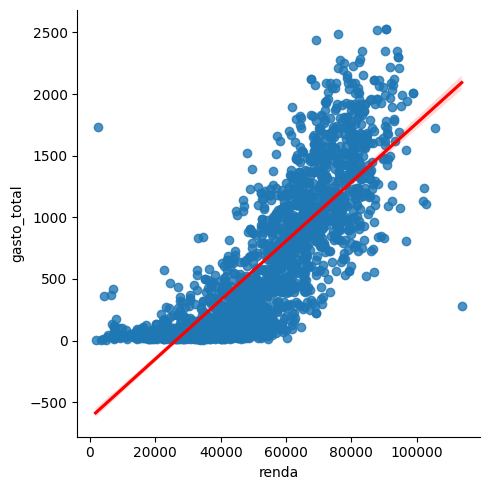

In [90]:
# Plot
sns.lmplot(x = 'renda', y = 'gasto_total', data = df_dsa, palette = 'blue', line_kws = {'color': 'red'})

### Quais Fatores São Mais Importantes Para Explicar a Decisão do Cliente em Aceitar ou Não a Campanha?

In [118]:
df_dsa.head()

,id,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,...,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total,resposta_campanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,47,255,8,162,0
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,64,259,26,1123,0
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,54,1294,4,17,0
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,55,272,14,1044,0
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,45,2665,19,758,0


In [119]:
# Converte as variáveis do tipo texto em representação numérica usando One-Hot Encoding
df_dsa_imp = pd.get_dummies(df_dsa, columns = ['educacao', 'estado_civil'])

In [120]:
df_dsa_imp.columns

Index(['id', 'renda', 'criancas_em_casa', 'adolescentes_em_casa',
       'gasto_vinhos', 'gasto_frutas', 'gasto_carnes', 'gasto_peixes',
       'gasto_doces', 'gasto_outros', 'num_compras_promocionais',
       'num_compras_web', 'num_compras_catalogo', 'num_compras_loja',
       'num_visitas_web_mes', 'aceitou_campanha_1', 'aceitou_campanha_2',
       'aceitou_campanha_3', 'aceitou_campanha_4', 'aceitou_campanha_5',
       'aceitou_campanha_6', 'idade', 'dias_como_cliente', 'total_compras',
       'gasto_total', 'resposta_campanha', 'educacao_Ensino Fundamental',
       'educacao_Ensino Médio', 'educacao_Graduação', 'educacao_Mestrado',
       'educacao_PhD', 'estado_civil_Casado', 'estado_civil_Divorciado',
       'estado_civil_Solteiro', 'estado_civil_Viúvo'],
      dtype='object')

In [121]:
df_dsa_imp.head()

,id,renda,criancas_em_casa,adolescentes_em_casa,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,gasto_doces,gasto_outros,...,resposta_campanha,educacao_Ensino Fundamental,educacao_Ensino Médio,educacao_Graduação,educacao_Mestrado,educacao_PhD,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Solteiro,estado_civil_Viúvo
0,9970,55375.0,0,1,42,11,57,10,28,14,...,0,False,False,True,False,False,True,False,False,False
1,4002,77037.0,0,1,463,96,333,168,53,10,...,0,False,False,False,False,True,True,False,False,False
2,10914,24163.0,1,1,4,1,7,2,1,2,...,0,False,False,True,False,False,False,False,True,False
3,7279,69476.0,0,0,260,86,559,63,9,67,...,0,False,False,False,False,True,True,False,False,False
4,10582,72063.0,0,1,180,32,348,76,32,90,...,0,False,False,True,False,False,True,False,False,False


In [122]:
# Vamos remover variáveis que seriam redundantes ou desnecessárias
# Como estamos criando X (dados de entrada) removemos RespostaCampanha (dados de saída)
X = df_dsa_imp.drop(['id',
                     'gasto_total',
                     'num_compras_web', 
                     'num_compras_catalogo', 
                     'num_compras_loja',
                     'aceitou_campanha_1', 
                     'aceitou_campanha_2', 
                     'aceitou_campanha_3', 
                     'aceitou_campanha_4', 
                     'aceitou_campanha_5', 
                     'aceitou_campanha_6',
                     'resposta_campanha'], axis = 1)

In [125]:
# Converte a variável em representação numérica
y = df_dsa_imp['resposta_campanha']

In [127]:
y.value_counts()

resposta_campanha
0    1601
1     604
Name: count, dtype: int64

In [128]:
# Cria o modelo
modelo_rf = RandomForestClassifier(random_state = 43)      

In [129]:
# Treina o modelo
modelo_dsa = modelo_rf.fit(X,y)

In [130]:
# Extrai a importância de cada variável
importances = modelo_dsa.feature_importances_
importances

array([0.1146959 , 0.00994779, 0.01627953, 0.15600639, 0.05789874,
       0.09595873, 0.05713625, 0.05746593, 0.09190947, 0.03167677,
       0.04838956, 0.05880984, 0.06927368, 0.06469122, 0.00153217,
       0.00514402, 0.01167523, 0.00828383, 0.01121586, 0.01160569,
       0.00680194, 0.00958668, 0.00401478])

In [131]:
# Desvio padrão das importâncias das características (feature importances) 
std = np.std([tree.feature_importances_ for tree in modelo_dsa.estimators_], axis = 0)

In [132]:
# Índices
indices = np.argsort(importances)

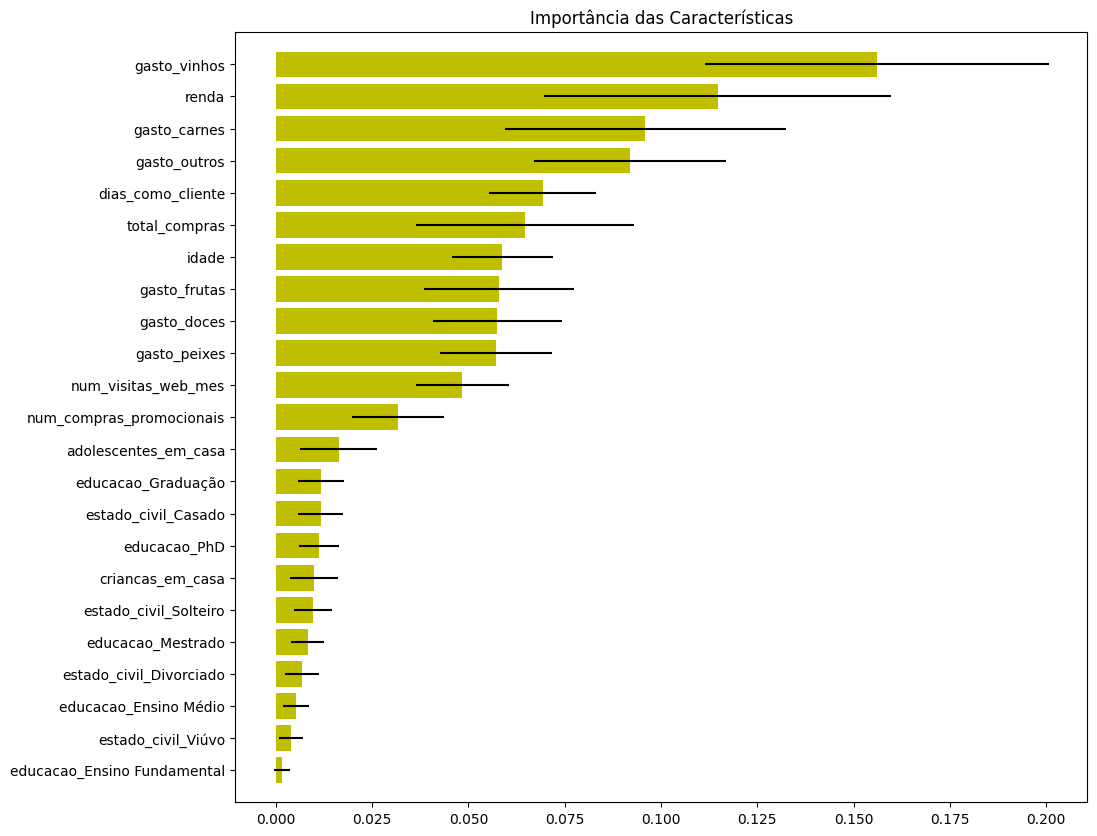

In [133]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Importância das Características")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

## Teste de Hipóteses

Nível educacional não parece ser relevante para explicar a resposta do cliente à campanha de Marketing. Por outro lado, Renda é bastante relevante. É provável que a média de renda seja diferente entre os níveis educacionais.

Vamos testar a hipótese de que existe diferença significativa entre as médias de Renda dos clientes Com Ensino Superior e Sem Ensino Superior. Antes, vamos explorar essa relação.

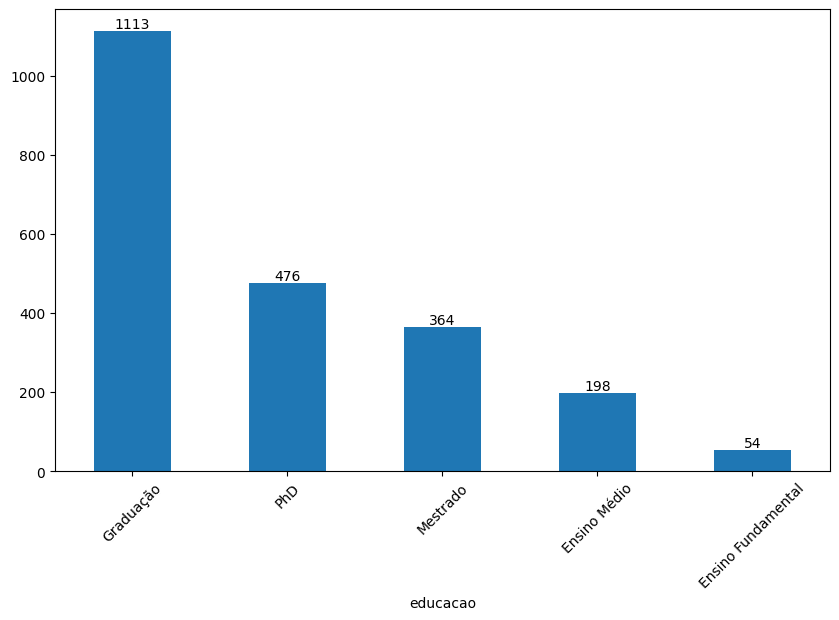

In [130]:
# Plot do total de clientes por nível educacional
plt.figure(figsize = (10, 6))
ax = df_dsa.educacao.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

In [ ]:
df_dsa.columns

Index(['ID', 'Educacao', 'Estado_Civil', 'Renda', 'Criancas_Em_Casa',
       'Adolescentes_Em_Casa', 'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes',
       'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1',
       'Aceitou_Campanha_2', 'Aceitou_Campanha_3', 'Aceitou_Campanha_4',
       'Aceitou_Campanha_5', 'Aceitou_Campanha_6', 'Idade',
       'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha'],
      dtype='object')

> Média de Renda Por Nível Educacional 

In [131]:
# Calcula a média
media_renda = df_dsa.groupby('educacao')['renda'].mean().reset_index()
media_renda = media_renda.sort_values(by = 'renda')

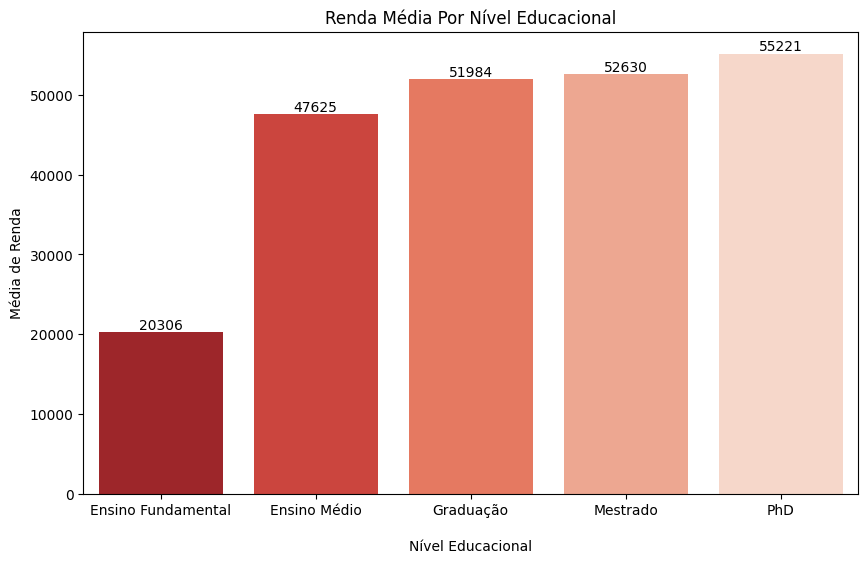

In [132]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = media_renda['educacao'], y = media_renda['renda'], data = df_dsa, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média Por Nível Educacional')
plt.show()

### Definindo as Hipóteses

Para escolher o Teste de Hipóteses precisamos verificar se as variáveis seguem ou não uma distribuição normal. Se as variáveis seguirem uma distribuição normal podemos usar um teste paramétrico. Caso contrário, devemos usar um teste não paramétrico.

**Hipótese Nula (H0)**: A hipótese nula é uma declaração de "não diferença". Em nosso caso, ela afirma que "Não há diferença significativa nas médias de renda de grupos com e sem nível superior". Isso significa que qualquer diferença observada nos dados entre os grupos pode ser atribuída ao acaso.

**Hipótese Alternativa (H1)**: A hipótese alternativa contrapõe a hipótese nula. Ela afirma que "Há uma diferença significativa nas médias de renda de grupos com e sem nível superior". Isso implica que as diferenças observadas são reais e não apenas resultado de variações aleatórias.

Quando você realiza um teste estatístico (como um teste t de Student para amostras independentes ou um teste não paramétrico como o Mann-Whitney U se as suposições do teste t não são atendidas), você está testando essas hipóteses. O resultado do teste (em especial, o valor-p) indica se você deve ou não rejeitar a hipótese nula:

**Valor-p Baixo (tipicamente < 0,05)**: Se o valor-p do teste for menor que o nível de significância escolhido (geralmente 0,05), você rejeita a hipótese nula, sugerindo que há evidências suficientes para afirmar que existe uma diferença significativa nas médias de renda entre os grupos.

**Valor-p Alto**: Se o valor-p for maior que o nível de significância, você não rejeita a hipótese nula, indicando que não há evidências suficientes para afirmar que existe uma diferença significativa.

É importante lembrar que "não rejeitar a hipótese nula" não é o mesmo que provar que a hipótese nula é verdadeira. Significa apenas que, com os dados disponíveis, não há evidências suficientes para apoiar a hipótese alternativa.

In [ ]:
# Representação numérica da variável categórica
df_dsa['Educacao'] = df_dsa['Educacao'].map({'Ensino Fundamental':1,
                                             'Ensino Médio':2,
                                             'Graduação':3,
                                             'Mestrado':4,
                                             'PhD':5})

In [ ]:
df_dsa.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,3,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,47,255,8,162,Não Aceitou
1,4002,5,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,64,259,26,1123,Não Aceitou
2,10914,3,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,54,1294,4,17,Não Aceitou
3,7279,5,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,55,272,14,1044,Não Aceitou
4,10582,3,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,45,2665,19,758,Não Aceitou


In [ ]:
# Dados que serão testados
dados_para_testar = df_dsa[['Renda', 'Educacao']]

In [ ]:
dados_para_testar.head()

,Renda,Educacao
0,55375.0,3
1,77037.0,5
2,24163.0,3
3,69476.0,5
4,72063.0,3


### Aplicando o Teste de Normalidade Para Selecionar o Teste de Hipóteses Adequado

O Teste de Shapiro-Wilk é um teste estatístico usado para avaliar a normalidade de uma distribuição de dados. Este teste é especialmente útil para amostras pequenas (geralmente, menos de 50 observações), embora também possa ser aplicado a conjuntos de dados maiores. As hipóteses para o Teste de Shapiro-Wilk são formuladas da seguinte forma:

**Hipótese Nula (H0)**: A hipótese nula do Teste de Shapiro-Wilk afirma que os dados seguem uma distribuição normal. Em outras palavras, assume-se que a distribuição da amostra em questão não difere significativamente de uma distribuição normal teórica.

**Hipótese Alternativa (H1)**: A hipótese alternativa é que os dados não seguem uma distribuição normal. Isso significa que há evidências suficientes nos dados para sugerir que a distribuição se desvia da normalidade.

Ao realizar o Teste de Shapiro-Wilk, você calcula um valor-p que indica a probabilidade de obter a amostra observada (ou uma mais extrema) assumindo que a hipótese nula seja verdadeira.

Se o valor-p for baixo (geralmente, menor que o nível de significância escolhido, como 0,05), você rejeita a hipótese nula, sugerindo que os dados não vêm de uma distribuição normal.

Se o valor-p for alto, você não rejeita a hipótese nula, o que indica que não há evidências suficientes para afirmar que os dados não seguem uma distribuição normal.

É importante notar que o Teste de Shapiro-Wilk, como outros testes de normalidade, pode ser sensível ao tamanho da amostra. Com amostras muito grandes, o teste pode detectar pequenos desvios da normalidade que podem não ser relevantes na prática. Por outro lado, em amostras muito pequenas, o teste pode não ter poder suficiente para detectar desvios significativos da normalidade.

In [ ]:
# Teste Shapiro-Wilk 
def dsa_testa_normal(columns):
    
    for column in columns:
        
        statistic, p_value = shapiro(dados_para_testar[column])

        alpha = 0.05
        
        if p_value < alpha:
             print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.')
        else:
             print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Falhamos em Rejeitar a H0 do Teste Shapiro-Wilk: Os dados seguem uma distribuição normal.')

In [ ]:
dsa_testa_normal(dados_para_testar)


Renda: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.

Educacao: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.


### Aplicando Teste de Hipóteses Não Paramétrico

O teste de Mann-Whitney U é uma técnica estatística usada para comparar diferenças entre dois grupos independentes quando os dados não seguem necessariamente uma distribuição normal. Este teste é uma alternativa não paramétrica ao teste t de Student para amostras independentes e é frequentemente usado quando as condições para o teste t não são atendidas (por exemplo, quando a distribuição dos dados é significativamente não normal).

In [ ]:
# Criando os grupos
grupo_com_graduacao = df_dsa[df_dsa['Educacao'].isin([5, 4, 3])]['Renda']
grupo_sem_graduacao = df_dsa[df_dsa['Educacao'].isin([1, 2])]['Renda']

In [ ]:
# Teste Mann-Whitney U 
statistic, p_value = mannwhitneyu(grupo_com_graduacao, grupo_sem_graduacao)

# Nível de significância
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de renda.")

Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.


## Conclusão

Os fatores mais relevantes que explicam a resposta dos clientes às campanhas de Marketing são o histórico de gasto total, a renda, o tempo total como cliente, idade e total de compras anteriores. Ou seja, clientes fiéis estão mais propensos a aceitar campanhas de Marketing.

O nível educacional e o estado civil não parecem ser fatores relevantes para explicar a resposta à campanha de Marketing. Decidimos então aplicar um teste de hipóteses.

Ao testar a hipótese que existe diferença significativa entre as médias de renda de clientes com ou sem graduação, ficou evidente que existe diferença. Vimos ainda que níveis educacionais mais altos têm média de renda maior.

Logo, a empresa deveria segmentar suas campanhas de Marketing para os diferentes públicos e direcionar as campanhas com base na renda e no nível educacional, considerando ainda histórico de gasto total, o tempo total como cliente, idade e total de compras anteriores.

In [ ]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [ ]:
#%watermark -v -m

In [ ]:
#%watermark --iversions